In [16]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import asciitable as a
import pandas as pd
%matplotlib inline

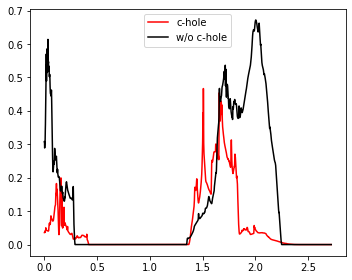

In [154]:
fname="../data/corehole/OK-withhole-LDA.csv"
data=pd.read_csv(fname,usecols=[1,2,3,4],names=['energy','x','y','z'],skiprows=1)
data['average']=(data.x+data.y+data.z)/3
e=data.energy.values
avg=data.average.values
fig,ax=plt.subplots(figsize=(5,4))
ax.plot(e,avg,c="r",label="c-hole")


fname="../data/corehole/OK-nohole-LDA.csv"
data=pd.read_csv(fname,usecols=[1,2,3,4],names=['energy','x','y','z'],skiprows=1)
data['average']=(data.x+data.y+data.z)/3
e=data.energy.values
avg=data.average.values
ax.plot(e,avg,c="k",label="w/o c-hole")
plt.tight_layout()
plt.legend()

In [159]:
from numba import njit
@njit
def spectrum(E,osc,sigma,x):
    gE=[]
    for Ei in x:
        tot=0
        for Ej,os in zip(E,osc):
            tot+=os*np.exp(-((((Ej-Ei)/sigma)**2)))
        gE.append(tot)
    return gE





fname="../data/corehole/QSGW_DOS.csv"
data=pd.read_csv(fname)#,usecols=[1,2,3,4],names=['energy','x','y','z'],skiprows=1)
energy=data['Energy (eV)'].values
total=data.iloc[:,range(2,len(data.keys()))].sum(axis=1).values
vals=np.zeros(energy.shape)
for i in ['O2-py', 'O2-pz', 'O2-px','O1-py', 'O1-pz', 'O1-px']:
    vals+=data[i]
# vals=spectrum(energy,vals,sigma=.08,x=energy)



In [157]:
spinel=np.loadtxt("../ab-initio/spinel/dosp.2",comments="%")

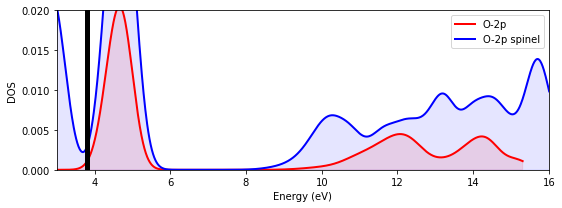

In [210]:
fig,ax=plt.subplots(figsize=(8,3))
d=0.4
y=vals.values
y=spectrum(energy,y,d,energy)
y=y/np.linalg.norm(y)
ax.plot(energy,y,c="r",label="O-2p",lw=2)
ax.fill_between(energy,y,0,color="r",alpha=0.1)

y=spinel.T[0]
x=spinel.T[0]+3.2
y=spectrum(y,spinel.T[1],d,y)
y=y/np.linalg.norm(y)
ax.plot(x,y,c="b",label="O-2p spinel",lw=2)
ax.fill_between(x,y,color="b",alpha=0.1)

ax.axvline(3.8,c="k",lw=5)
# y=total
# y=spectrum(energy,y,d,energy)
# y=y/np.linalg.norm(y)
# ax.plot(energy,y,c="k",label="Total",lw=2)
# ax.fill_between(energy,y,0,color="k",alpha=0.1)
plt.ylim(0,.02)
plt.xlim(3,16)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("DOS")
plt.tight_layout()
plt.legend()

plt.savefig("O-2p.png",dpi=200)



In [182]:
from questaal_reader import get_bands
from pymatgen.electronic_structure.plotter import BSPlotter as bp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from matplotlib.lines import Line2D
from adjustText import adjust_text
import re
import matplotlib
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.ndimage
from tabulate import tabulate
from scipy.interpolate import Rbf

/Users/santy/Google Drive File Stream/My Drive/github projects/questaal-reader/questaal_reader.py:304: UserWarning: Only site.ext format 15 supported at present 
 if things dont work That might be the problem
  "Only site.ext format 15 supported at present \n if things dont work That might be the problem"


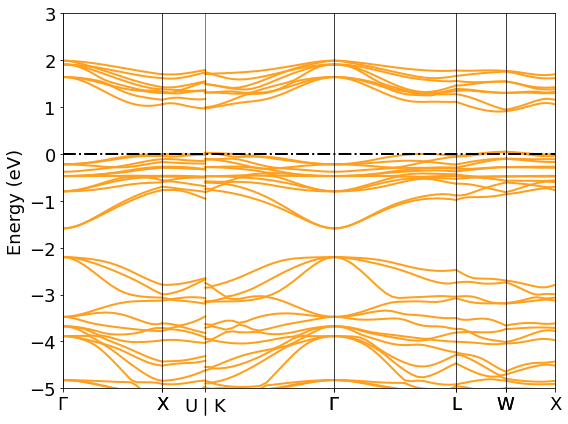

In [208]:
p_spinel=get_bands("../ab-initio/spinel/bnds.temp")
fig,ax=plt.subplots(figsize=(8,6))

colors = ["#ff9f1c","#e71d36","#14213d"]

bp_plot=bp(p_spinel).bs_plot_data()
ef=np.max(np.array(bp_plot['energy'][0]['1'])[30+13])
for i in range(len(bp_plot['distances'])):
    d=bp_plot['distances'][i]
    e=bp_plot['energy'][i]['1']
    e=e-ef
    for k in e:
        c=colors[0]
#         if k[0]>0:c=colors[1]#ls="-."#c="#e9c46a"
#         else:ls="-"#c="#e76f51"
        
        plt.plot(d,k,c=c,lw=2,ls=ls)
fs=18
plt.yticks(fontsize=fs)
ax.set_xticks(bp_plot['ticks']["distance"])
ax.set_xticklabels(bp_plot['ticks']["label"],fontsize=fs)
for i in bp_plot['ticks']["distance"]:plt.axvline(i,c="k",lw=0.5)
ax.axhline(0,ls="-.",c="k",lw=2)
plt.ylim(-5,3)
ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylabel("Energy (eV)",fontsize=fs)
plt.tight_layout()
plt.savefig("spinel_bands.png",dpi=200)

-0.41633420607539995